In [2]:
import torch
import matplotlib.pyplot as plt
from torch import nn
from matplotlib import ticker
import warnings
warnings.filterwarnings("ignore")

# 绘制注意力热图
def show_attention(axis, attention):
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111)
    cax=ax.matshow(attention, cmap='bone')
    if axis is not None:
        ax.set_xticklabels(axis[0])
        ax.set_yticklabels(axis[1])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.show()

In [4]:
# 生成一个样例
sentence = 'I love deep learning more than machine learning'
tokens = sentence.split(' ')

attention_weights = torch.eye(8).reshape((8, 8)) + torch.randn((8, 8)) * 0.1  # 生成注意力权重矩阵
attention_weights

tensor([[ 9.9110e-01, -3.6609e-02, -1.0983e-01, -2.8364e-01, -6.3964e-02,
          1.3416e-01,  5.7646e-02,  3.5187e-02],
        [-5.8021e-02,  1.0324e+00,  3.3832e-02, -7.4653e-02, -2.1400e-03,
          2.4484e-04,  3.1499e-02, -1.0604e-01],
        [ 1.6816e-02,  1.2311e-01,  9.7228e-01, -3.8207e-02, -1.7254e-01,
         -2.1812e-02, -4.4875e-02, -4.7127e-02],
        [-6.9744e-02, -1.8509e-01, -1.3452e-01,  9.8716e-01,  2.3105e-03,
         -6.0984e-03, -2.7989e-02, -9.8193e-02],
        [-3.3011e-02,  2.2618e-02, -2.3707e-02,  5.9585e-02,  1.0036e+00,
          1.2704e-01,  9.4356e-02, -1.4056e-01],
        [-7.0797e-02, -5.4344e-02,  4.5254e-02,  1.0265e-01,  2.0885e-01,
          1.0752e+00,  6.7950e-02,  7.6165e-02],
        [-1.7103e-01, -8.4211e-02,  3.8260e-02, -1.3634e-01,  6.6262e-03,
         -7.2547e-02,  1.0795e+00,  6.3381e-02],
        [-1.0347e-01,  9.7392e-02, -7.0374e-02,  6.8621e-02,  5.1689e-02,
          3.0412e-02, -7.3732e-02,  8.3678e-01]])

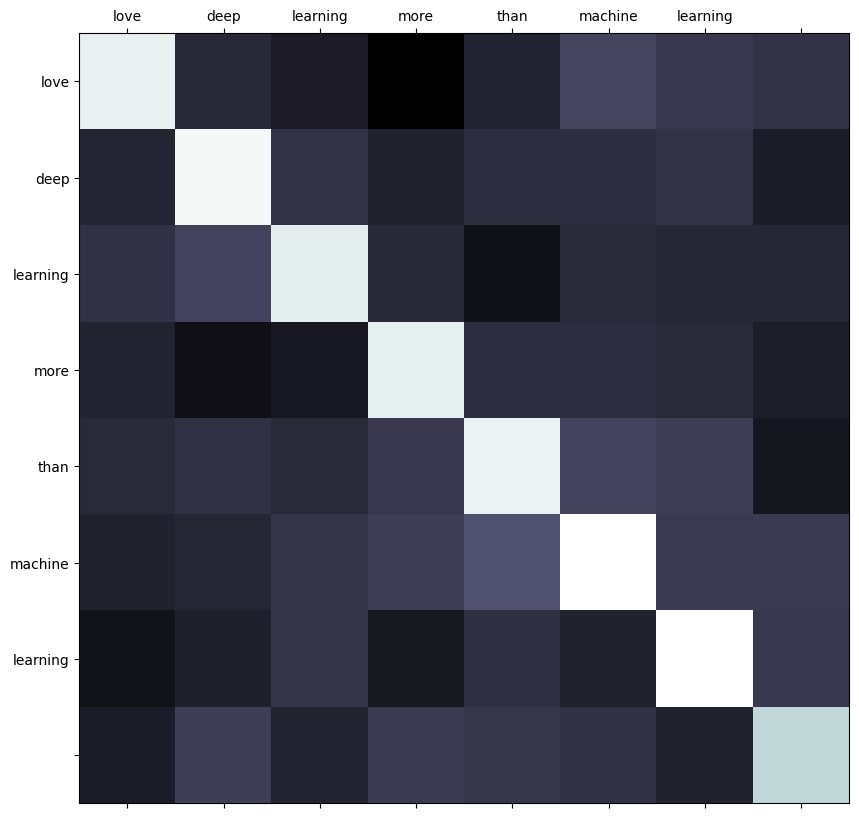

In [5]:
show_attention([tokens, tokens], attention_weights)

In [7]:
# 定义一个映射函数
def func(x):
    return x + torch.sin(x)  # 映射函数 y = x + sin(x)

n = 100  # 样本个数100
x, _ = torch.sort(torch.rand(n) * 10)  # 生成0-10的随机样本并排序
y = func(x) + torch.normal(0.0, 1, (n,))  # 生成训练样本对应的y值，增加均值为0，标准差为1的扰动

x, y

(tensor([0.1628, 0.6456, 0.9112, 0.9474, 1.0274, 1.0303, 1.1275, 1.2169, 1.2476,
         1.4661, 1.8080, 1.8885, 1.9190, 1.9755, 2.1431, 2.2512, 2.2750, 2.3294,
         2.4816, 2.6609, 2.8468, 3.0851, 3.2844, 3.3318, 3.3996, 3.6065, 3.6375,
         3.6868, 3.7888, 3.9686, 3.9830, 4.2534, 4.3583, 4.4534, 4.5019, 4.6146,
         4.6355, 4.6760, 4.7548, 4.7823, 4.9970, 5.0141, 5.0377, 5.1301, 5.1626,
         5.2933, 5.3333, 5.3960, 5.4394, 5.4572, 5.4745, 5.5366, 5.6482, 5.7167,
         5.7683, 5.9431, 6.0624, 6.3600, 6.3936, 6.4449, 6.4539, 6.5665, 6.6466,
         6.7089, 6.9140, 6.9224, 6.9724, 7.0436, 7.0820, 7.2581, 7.3507, 7.3541,
         7.3746, 7.5237, 7.5677, 7.6837, 7.6978, 7.7077, 7.7827, 7.9239, 8.1425,
         8.2467, 8.4722, 8.5094, 8.6674, 8.6745, 8.6996, 9.0530, 9.1005, 9.2291,
         9.2520, 9.2937, 9.3466, 9.3753, 9.4277, 9.4960, 9.4964, 9.5514, 9.8225,
         9.9796]),
 tensor([ 1.0295,  2.4469,  1.9616, -0.5731,  0.8333,  1.8414,  2.3842,  2.4920,
         

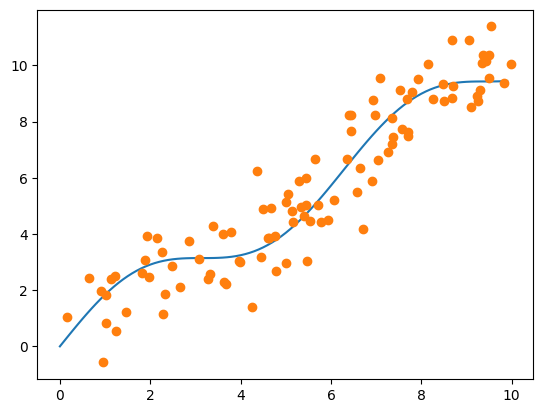

In [8]:
# 绘制曲线上的点
x_curve = torch.arange(0, 10, 0.1)
y_curve = func(x_curve)
plt.plot(x_curve, y_curve)
plt.plot(x, y, 'o')
plt.show()

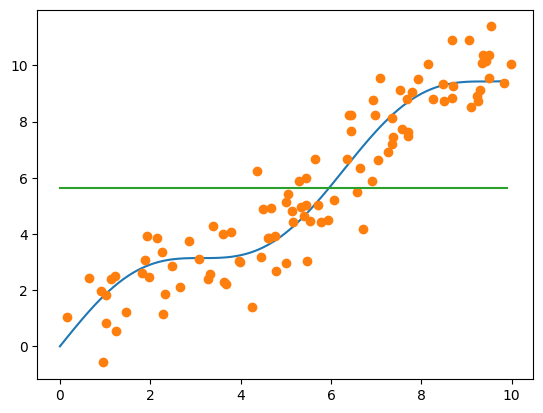

In [9]:
# 平均池化
y_hat = torch.repeat_interleave(y.mean(), n)  # 将y_train中的元素进行复制，输入张量为y.mean，重复次数为n
plt.plot(x_curve, y_curve)
plt.plot(x, y, 'o')
plt.plot(x_curve, y_hat)
plt.show()

In [10]:
# nadaraya-watson 核回归
x_nw = x_curve.repeat_interleave(n).reshape((-1, n))
x_nw.shape, x_nw

(torch.Size([100, 100]),
 tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
         [0.2000, 0.2000, 0.2000,  ..., 0.2000, 0.2000, 0.2000],
         ...,
         [9.7000, 9.7000, 9.7000,  ..., 9.7000, 9.7000, 9.7000],
         [9.8000, 9.8000, 9.8000,  ..., 9.8000, 9.8000, 9.8000],
         [9.9000, 9.9000, 9.9000,  ..., 9.9000, 9.9000, 9.9000]]))

In [11]:
# 带入公式得到注意力权重矩阵
attention_weights = nn.functional.softmax(-(x_nw - x)**2 / 2, dim=1)
attention_weights.shape, attention_weights

(torch.Size([100, 100]),
 tensor([[1.3732e-01, 1.1298e-01, 9.1878e-02,  ..., 2.1552e-21, 1.5592e-22,
          3.2894e-23],
         [1.2527e-01, 1.0816e-01, 9.0324e-02,  ..., 5.0272e-21, 3.7369e-22,
          8.0083e-23],
         [1.1389e-01, 1.0319e-01, 8.8500e-02,  ..., 1.1687e-20, 8.9262e-22,
          1.9432e-22],
         ...,
         [1.0486e-21, 9.3292e-20, 9.9741e-19,  ..., 5.8516e-02, 5.8724e-02,
          5.6897e-02],
         [4.2839e-22, 3.9998e-20, 4.3914e-19,  ..., 6.1128e-02, 6.3031e-02,
          6.2038e-02],
         [1.7436e-22, 1.7085e-20, 1.9263e-19,  ..., 6.3621e-02, 6.7405e-02,
          6.7393e-02]]))

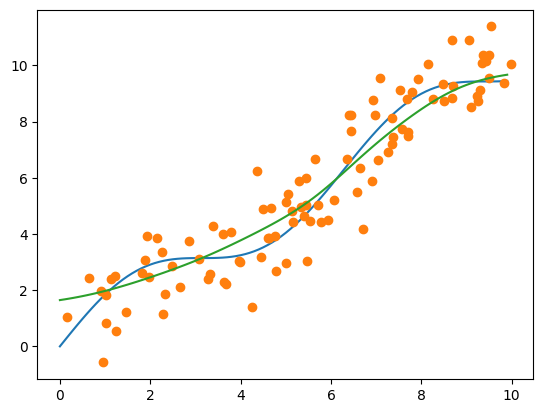

In [12]:
# y_hat 为注意力权重和y值的乘积，是加权平均值
y_hat = torch.matmul(attention_weights, y)
plt.plot(x_curve, y_curve)
plt.plot(x, y, 'o')
plt.plot(x_curve, y_hat)
plt.show()

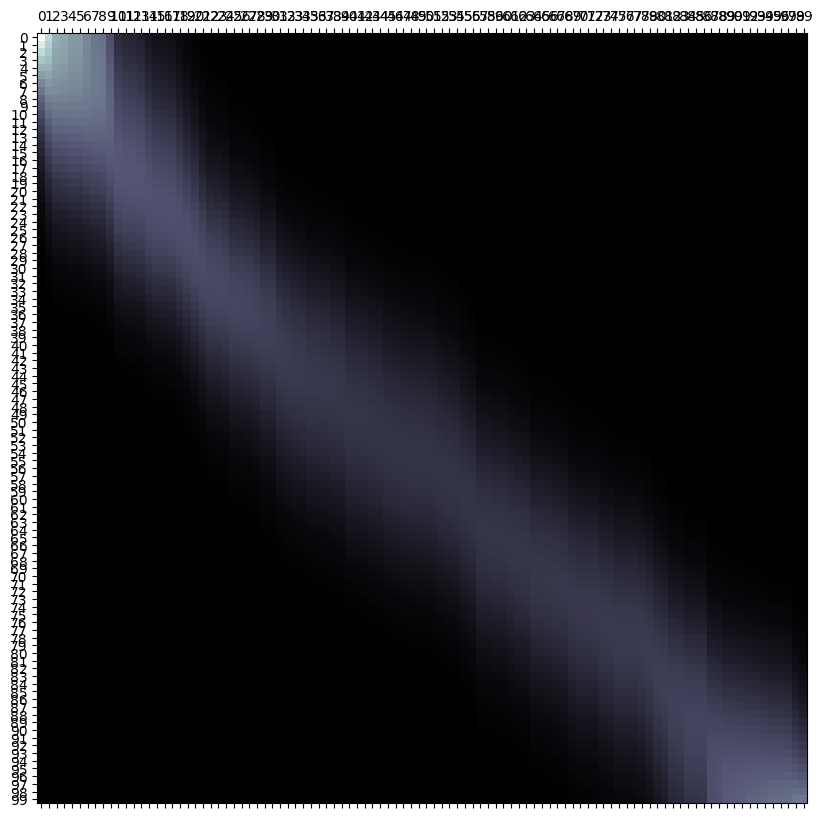

In [13]:
show_attention(None, attention_weights)  # 展示注意力热图